In [495]:
import numpy as np
import matplotlib.pyplot as plt

def reqpow(bg):
    """
    Calculates the power required for a refrigeration system
    which has two design parameters: b and g and the gradient
    of the power with respect to b and g

    Args:
        bg (1D numpy array): b = bg[0], g = bg[1]
        
    Returns:
        P (float): the required power
        Pprime (1D numpy array): gradient of P
    """
    b = bg[0]
    g = bg[1]
    
    x   = 10*(b-1)
    x_b = 10.
    y   = g-10
    y_g = 1.0
    P   = 1 - 0.3854*np.exp(-x**2)/(y**2 + 1) + (1e-6)*y**4
    P_x = 0.3854*(2*x)*np.exp(-x**2)/(y**2 + 1)
    P_y = 0.3854*(2*y)*np.exp(-x**2)/(y**2 + 1)**2 + 4*(1e-6)*y**3
    P_b = P_x*x_b
    P_g = P_y*y_g
    
    Pprime = np.array([P_b, P_g])
    
    return P, Pprime

In [496]:
myarray = np.zeros((5, 2))
myarray

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [497]:
def gd(x0, func, alpha, steps):
    """Applies gradient descent to x0 "steps" number of times.

    Args:
        x0 (ndarray): the state vector at t=0
        func (function): function to be used on state vector, func[0] is function output at current state, func[1] is gradient of the function at current state
        alpha (float): step size of the gradient descent
        steps (integer): number of steps to apply the gradient descent
        
    Returns:
        xn_array (ndarray): returns "steps" + 1 number of state vectors. (x0 state and "steps" number of states)
    """
    
    xn_array = np.zeros((steps, len(x0)))
    
    xn = x0
    xn_array[0, :] = xn
    
    for i in range(steps - 1):
        xn = xn - alpha * func(xn)[1]
        xn_array[i + 1, :] = xn
        # print("xn_array =", xn_array)
    
    return xn_array

In [498]:
x0 = np.array((1.10, 8.0))
alpha = 0.08
steps = 1000

gd_array = gd(x0, reqpow, alpha, steps)

# with np.printoptions(threshold=np.inf):
#     print(gd_array)

[[0.99984077 0.99982267 0.99980465 ... 0.99980465 0.99982267 0.99984077]
 [0.99980619 0.99978743 0.99976872 ... 0.99976872 0.99978743 0.99980619]
 [0.99976912 0.99974965 0.99973021 ... 0.99973021 0.99974965 0.99976912]
 ...
 [0.99976912 0.99974965 0.99973021 ... 0.99973021 0.99974965 0.99976912]
 [0.99980619 0.99978743 0.99976872 ... 0.99976872 0.99978743 0.99980619]
 [0.99984077 0.99982267 0.99980465 ... 0.99980465 0.99982267 0.99984077]]


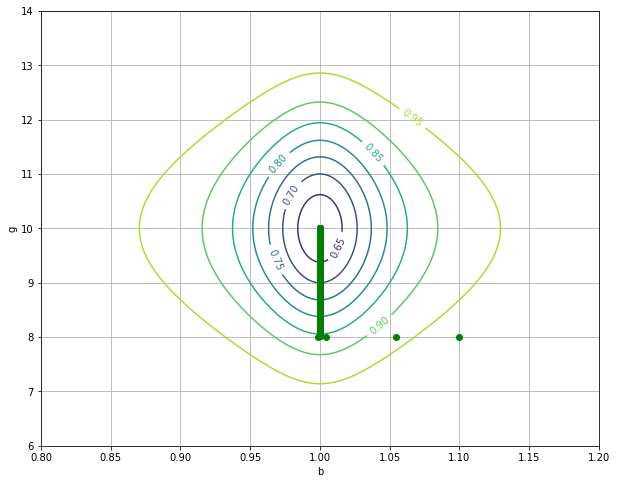

In [499]:
b = np.linspace(0.80, 1.20, 200)
g = np.linspace(6, 14, 200)
f = np.zeros((len(b), len(g)))

bg_array = np.zeros(2)
for j in range(len(g)):
    for i in range(len(b)):
        bg_array[0] = b[i]
        bg_array[1] = g[j]
        f[i,j] = reqpow(bg_array)[0]

print(f)

fig, axs = plt.subplots(figsize=(10, 8))
Cf = axs.contour(b, g, f)
axs.set_xlabel("b")
axs.set_ylabel("g")
axs.clabel(Cf)
axs.grid(True)


axs.plot(gd_array[:, 0], gd_array[:, 1], "go")

In [500]:
import numpy as np
import matplotlib.pyplot as plt

def biuniform(xmode0, xmode1, Pmode0=0.5, N=1, seed=None):
    """
    Returns an array of size N of random numbers x which have two modes 
    (i.e. the distribution is bimodal) from:
        xmode0[0] < x < xmode0[1]
        xmode1[0] < x < xmode1[1]
        
    where the probability of being in mode0 is Pmode0, and within either mode, 
    the distributions are uniform.
    
    Args:
        xmode0 (tuple): range of mode0 = xmode0[0] to xmode0[1]
        xmode1 (tuple): range of mode1 = xmode1[0] to xmode1[1]
        Pmode0 (float): probability of being in mode0
        N (shape): either an integer or shape tuple giving the size of the
                   random number array to generate
        seed (int or None): seed to be used for random number generator 
    """
    rng = np.random.default_rng(seed)
    Pmode = rng.uniform(0,1,N)
    mode0 = rng.uniform(xmode0[0],xmode0[1],N)
    mode1 = rng.uniform(xmode1[0],xmode1[1],N)
    x = np.where(Pmode>Pmode0, mode1, mode0)
 
    return x

xA = biuniform( (-2,-1), (1,2))
xB = biuniform( (-2,-1), (1,2), Pmode0=0.5)
xC = biuniform( (-2,-1), (1,2), Pmode0=0.5, N=100)
xD = biuniform( (-2,-1), (1,2), N=100)
xE = biuniform( (-2,-1), (1,2), Pmode0=0.5, N=100, seed=314)
xF = biuniform( (-2,-1), (1,2), N=100, seed=314)

In [501]:
mean_xE = xE.mean()
std_xE = xE.std(ddof=1)
print(f"sample mean of xE = {mean_xE:.3e}")
print(f"sample standard deviation of xE = {std_xE:.3e}")

sample mean of xE = -1.628e-01
sample standard deviation of xE = 1.580e+00


In [502]:
std_error_xE = std_xE / 10
print(f"standard error of mean of xE estimator = {std_error_xE:.3e}")

standard error of mean of xE estimator = 1.580e-01


In [503]:
theta_low = -1.96 * std_error_xE + mean_xE
theta_high = 1.96 * std_error_xE + mean_xE
print(f"{theta_low:.3e}")
print(f"{theta_high:.3e}")

-4.725e-01
1.468e-01


In [504]:
fE = xE ** 2
fE

array([3.62019955, 3.12059133, 1.01341089, 2.87979157, 2.19043062,
       2.62623103, 1.39973542, 3.64956243, 1.95437638, 3.80281699,
       3.45337161, 3.44018126, 2.97895062, 2.25533732, 2.79351651,
       1.72398919, 3.85232471, 2.08657797, 2.36296106, 1.34436677,
       2.69522535, 2.67014886, 2.35018776, 2.69377262, 1.9480005 ,
       3.43772616, 1.80196035, 1.41324535, 3.45350944, 3.48987902,
       3.58188236, 2.53686441, 1.19469889, 1.35136885, 2.1299396 ,
       2.64041695, 1.81491983, 2.23053054, 1.80025521, 2.16057654,
       3.45585179, 1.94912972, 1.71854629, 1.41967621, 3.03125157,
       3.66988572, 3.98925702, 3.8581847 , 3.93120247, 2.49094205,
       2.54191625, 3.67230045, 3.48083316, 2.44564443, 1.36066075,
       2.23691191, 1.01593537, 3.32836412, 2.22013156, 3.47994868,
       3.34515756, 2.1001546 , 1.45403752, 1.87757928, 1.54011626,
       3.21491795, 3.71867478, 1.77875571, 1.48682923, 3.0722927 ,
       3.40450324, 3.46591117, 1.75548027, 1.89959614, 1.40926

In [505]:
mean_fE = fE.mean()
std_fE = fE.std(ddof=1)
print(f"{mean_fE:.3e}")
print(f"{std_fE:.3e}")

2.497e+00
8.527e-01


In [506]:
fE_std_error = std_fE / 10

fE_low = -1.96 * fE_std_error + mean_fE
fE_high = 1.96 * fE_std_error + mean_fE

print(f"{fE_low:.3e}")
print(f"{fE_high:.3e}")

2.330e+00
2.664e+00
